# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing

>Check for missing values, class imbalance and categorical features

In [2]:
df = pd.read_csv('data.csv')
df.head()

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 452 entries, ID to class
dtypes: float64(300), int64(150), object(2)
memory usage: 614.6+ KB


### Dropping features

>We have 2 categorical columns in the dataset, 'ID', which is useles,s and the target 'class'
>We must drop the 'ID' column and remap the target feature to integers

In [4]:
# Drops the objects columns from the dataset
X = df.drop(['class', 'ID'], axis='columns')

# H: healthy patients
# P: patients with Alzheimer
y = df['class'].map({'P': 1, 'H': 0})

### Class balance

In [5]:
# Check for class distribution and type
y.value_counts()

class
1    89
0    85
Name: count, dtype: int64

### Missing data

In [6]:
# Check for missing values
X.isnull().values.any()

False

> Good, the data has no missing values and the target classes are well balanced

### Scaling

In [7]:

from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().set_output(transform="pandas").fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled.head()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
0,-0.039958,0.819201,-0.964281,-1.021048,-0.621190,-0.331301,-0.143336,0.583446,-1.097797,-0.210827,...,0.446195,-0.110468,1.905814,0.750685,0.368053,-0.541445,-0.157047,0.370324,2.347146,-0.039552
1,3.670803,1.863195,-0.994191,-1.051635,-0.172774,-0.149357,-0.377846,-0.541698,-1.131393,-0.371903,...,-2.266524,-1.589980,-0.657467,-1.874750,-2.259487,1.574847,4.390919,-0.386182,2.040903,0.271310
2,-0.242853,0.162976,-0.369289,-0.249241,0.216015,-0.697480,-0.077097,0.023550,-0.360783,-0.044734,...,-0.435581,0.482173,-1.159080,-0.315186,-0.563403,-0.431982,0.124509,-0.613046,-0.329030,-0.171900
3,-0.280104,0.162976,0.391119,-0.155526,-0.135051,0.382725,0.369034,-0.237507,0.205663,0.306488,...,-0.916895,-0.554289,-0.031154,-0.177609,-1.479491,1.355920,1.304574,-0.506614,1.184202,0.034342
4,-0.265837,-0.863121,-0.216284,-0.801634,-0.602937,-1.187857,-0.394751,-0.538220,-0.487082,-0.402728,...,-1.168098,-0.427298,0.394214,-0.770566,-1.400574,0.224798,-0.305967,0.656282,-0.084184,-0.184917


# Feature Selection

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Constants

In [9]:
# Constants used for all the experimentations
TEST_SIZE = 0.2
RANDOM_STATE = 42

# Used for random forest
N_ESTIMATORS = 100
MAX_DEPTH = 5
CRITERION = 'entropy'
CLASS_WEIGHT = {0: 1, 1: 2}

### Train Test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

### Create and fit the Random Forest

In [11]:
forest = RandomForestClassifier(n_estimators=100,
                                random_state=RANDOM_STATE,
                                criterion=CRITERION,
                                max_depth=MAX_DEPTH,
                                class_weight=CLASS_WEIGHT)
forest.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 2}, criterion='entropy',
                       max_depth=5, random_state=42)

### Measuring the Feature Importance

<Axes: xlabel='entropy', ylabel='feature'>

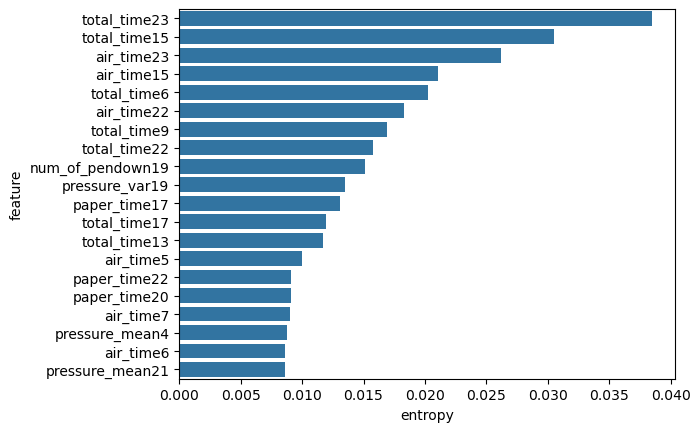

In [12]:
feature_imp_df = pd.DataFrame({'feature': X_scaled.columns, f"{CRITERION}": forest.feature_importances_}).sort_values(f"{CRITERION}", ascending=False)

sns.barplot(x=f"{CRITERION}", y='feature', data=feature_imp_df[:20])

### Counting the most important features

> Let's set a threshold of 0.05 and count how many features have importance below this value

> Why? To have a sense of how many features are were not considered important by the ensemble

In [13]:
THRESHOLD = 0.005

count = 0

for index, row in feature_imp_df.iterrows():
    if row[CRITERION] < THRESHOLD:
        count += 1

print(f"Features with Gini Importance < {THRESHOLD}: {count}")
print(f"Features with Gini Importance > {THRESHOLD}: {len(feature_imp_df) - count}")

Features with Gini Importance < 0.005: 405
Features with Gini Importance > 0.005: 45


# Reducing the Dataset

> Let's try to compare the performance of a chosen ML model trained by a dataset with decreasingly number of features

### Order dataset by decreasing criterion importance

In [73]:
cols = X.columns.tolist()
ordered = feature_imp_df['feature'].tolist()
new = [ item for item in ordered if item in cols]
test_df = X[new]
test_df.head()

,total_time23,total_time15,air_time23,air_time15,total_time6,air_time22,total_time9,total_time22,num_of_pendown19,pressure_var19,...,disp_index14,gmrt_on_paper14,paper_time19,paper_time2,mean_acc_in_air14,mean_acc_on_paper14,mean_gmrt14,mean_speed_in_air14,pressure_var2,num_of_pendown4
0,16160,32384,10965,17354,7675,13215,4910,18185,43,188183.0325,...,0.000008,130.525720,23540,18785,0.358369,0.155117,157.866244,2.670147,167223.59470,11
1,29900,41200,14660,26535,30080,18555,15380,33890,82,270924.3100,...,0.000034,65.171424,85710,15585,0.447537,0.160529,102.636012,2.605953,198894.33520,5
2,13865,33695,7330,22345,5345,7425,6970,12930,42,193490.8166,...,0.000010,172.657769,28785,6545,0.324243,0.157076,201.067244,3.065252,48577.01894,1
3,13585,28465,7205,21890,29970,8989,22255,16079,78,279448.8151,...,0.000014,116.981707,38930,13520,0.319645,0.156001,165.557964,3.804696,196922.24700,9
4,10145,24360,5340,18575,11870,3775,7680,8835,53,170823.7809,...,0.000011,97.601258,26945,8325,0.318395,0.149579,115.948258,1.784707,92904.05967,9


### Evaluate model function

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred):
    """ 
    Evaluate the model using accuracy, precision, recall and f1 score
        y_true: ndarray
            A numpy array of the true labels
        y_pred: ndarray
            A numpy array of the predicted labels
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label=0)
    recall = recall_score(y_true, y_pred, pos_label=0)
    f1 = f1_score(y_true, y_pred, pos_label=0)
    return accuracy, precision, recall, f1

In [16]:
from sklearn.tree import DecisionTreeClassifier

def fit_eval_tree(X, y, test_size, seed):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=test_size,
                                                        random_state=seed)
    # Fits the model
    tree = DecisionTreeClassifier(random_state=seed).fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    return np.array(evaluate_model(y_test, y_pred))

### Iterate through feature size

> Iterate through a decreasing size of features in the dataset, each time fitting and evaluating a model trained by the data. 

> The evaluation occurs N times and the final score is given by the mean 

In [ ]:
import random

N = 20
RANDOM_SEEDS = random.sample(range(1, 1000), N)

scores = {}

for features_num in range(X.shape[1],1,-1):

    reduced_df = test_df.iloc[:, :features_num]
    score = np.zeros(4)

    # Train and split the data with a random seed
    for seed in RANDOM_SEEDS:
        score += fit_eval_tree(reduced_df, y, TEST_SIZE, seed)

    scores[features_num] = score / N

results = pd.DataFrame(scores, index=['Accuracy', 'Precision', 'Recall', 'F1']).T

In [18]:
results.head()

,Accuracy,Precision,Recall,F1
450,0.762857,0.754107,0.766172,0.753236
449,0.772857,0.769400,0.767657,0.763201
448,0.784286,0.789227,0.769060,0.772872
447,0.775714,0.775925,0.761288,0.763275
446,0.768571,0.760036,0.776795,0.762681


### Plot the results

In [19]:
COLOR_PALETTE = "muted"

def plot_results(results):
    """
    Plots the results of the evaluation
        results: DataFrame
            A pandas DataFrame with the results
    """
    
    for color, feature in enumerate(results.columns):
        plt.style.use("dark_background")
        sns.set_palette(COLOR_PALETTE)

        fig, ax = plt.subplots()
        fig.set_size_inches(16, 9)
        sns.regplot(x=results.index, y=feature, data=results, scatter_kws={'alpha': 1}, line_kws={'color': 'red'}, color=sns.color_palette(COLOR_PALETTE)[color])
        plt.title(f'{feature} vs Number of Features')
        plt.xlabel('Number of Features')
        plt.show()


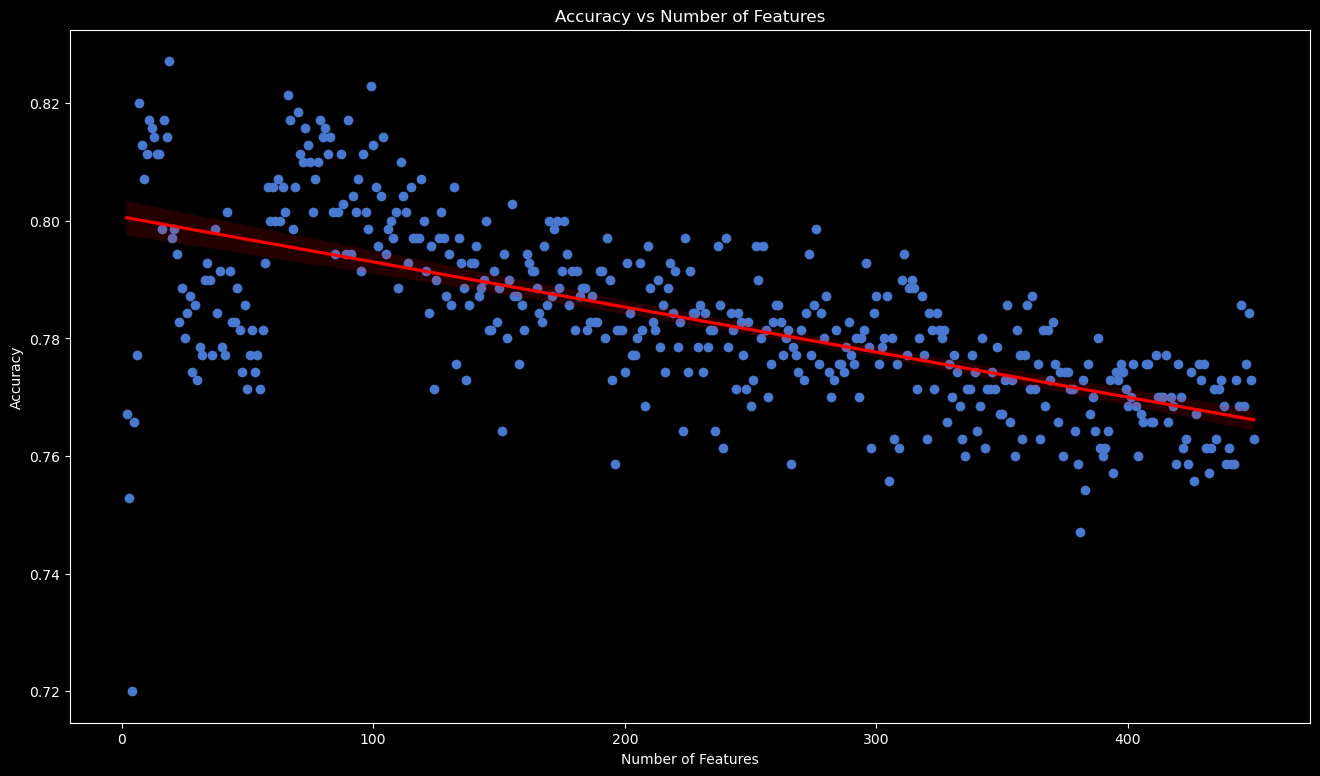

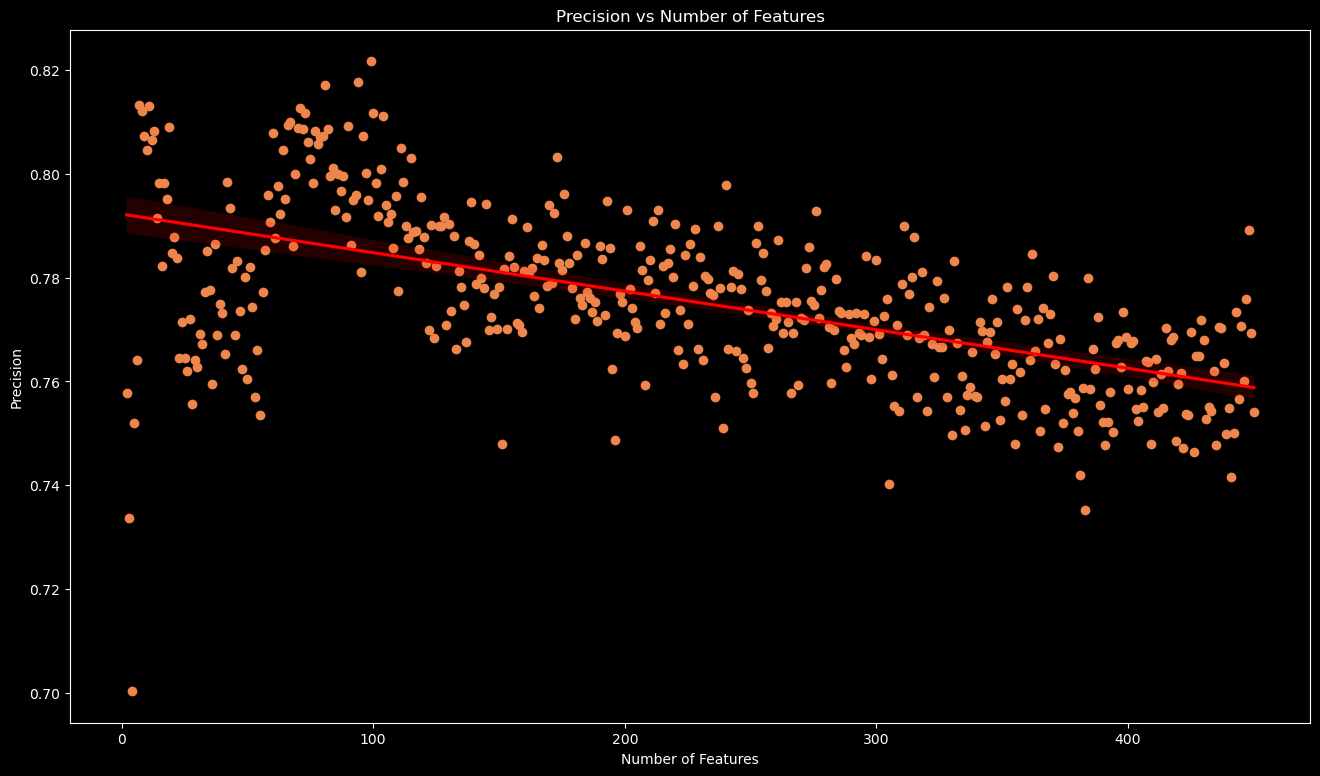

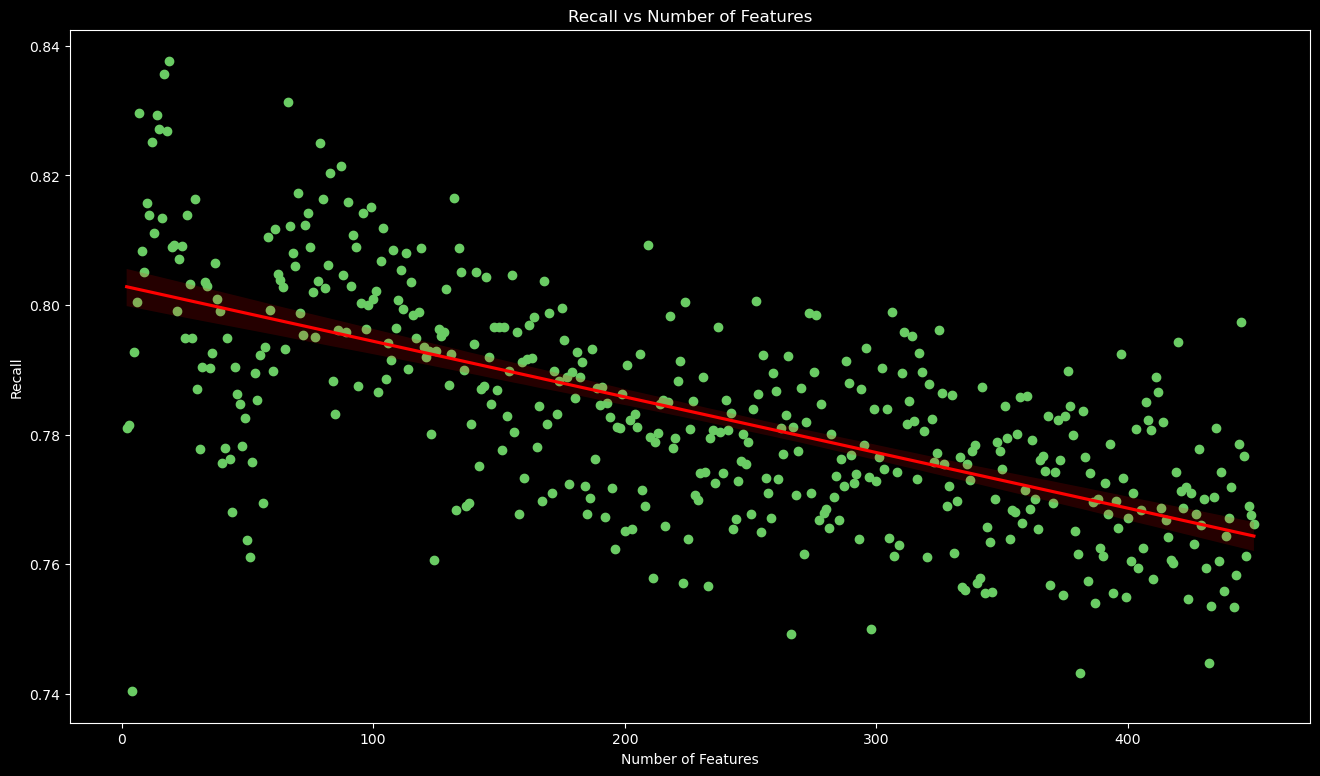

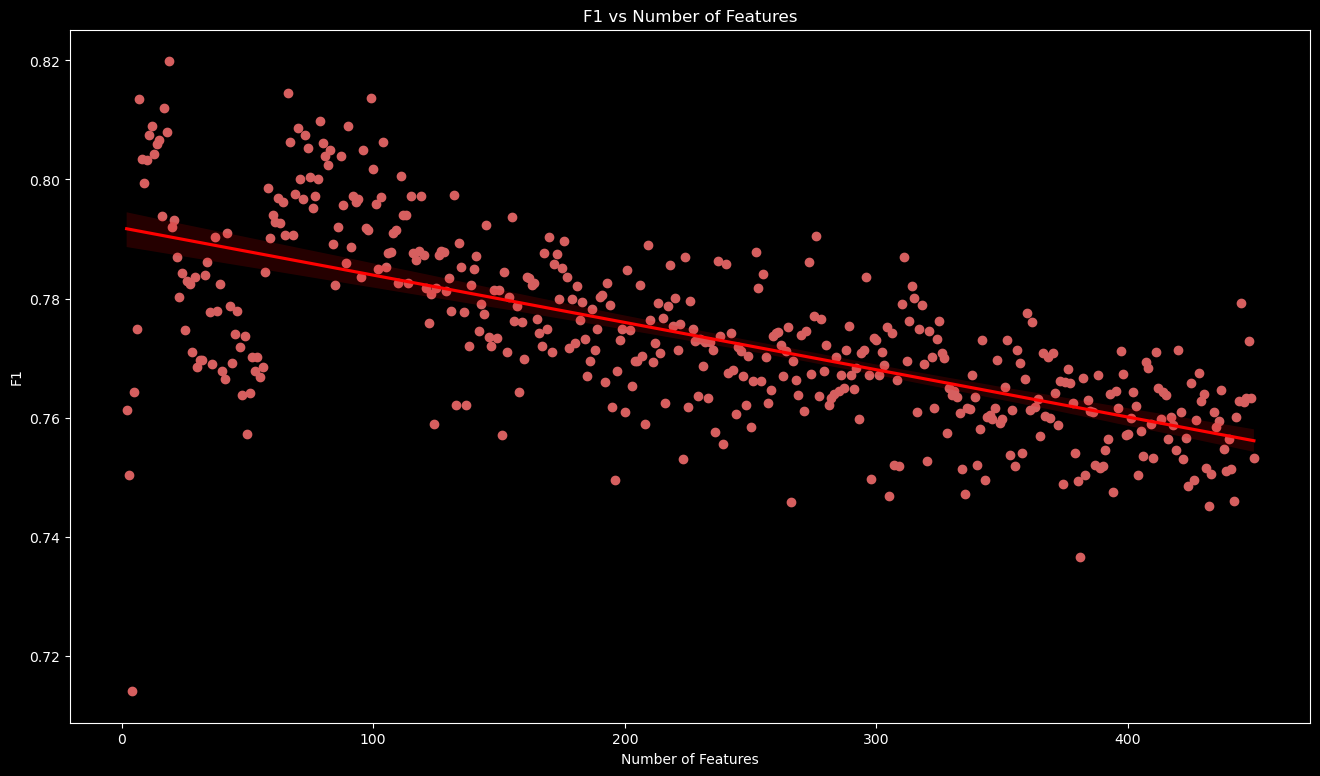

In [20]:
plot_results(results)

In [24]:
from sklearn.neural_network import MLPClassifier

def fit_eval_mlp(X, y, test_size, seed):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=test_size,
                                                        random_state=seed)
    # Fits the model
    mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32),
                        activation='relu',
                        solver='adam',
                        random_state=seed,
                        learning_rate='adaptive',
                        early_stopping=True,
                        ).fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    return np.array(evaluate_model(y_test, y_pred))

In [27]:
import random

N = 10
RANDOM_SEEDS = random.sample(range(1, 1000), N)

scores = {}

for features_num in range(X.shape[1],1,-1):

    reduced_df = test_df.iloc[:, :features_num]
    score = np.zeros(4)

    # Train and split the data with a random seed
    for seed in RANDOM_SEEDS:
        score += fit_eval_mlp(reduced_df, y, TEST_SIZE, seed)

    scores[features_num] = score / N

results = pd.DataFrame(scores, index=['Accuracy', 'Precision', 'Recall', 'F1']).T

/Users/eduardoduarte/miniconda3/envs/darwin/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/eduardoduarte/miniconda3/envs/darwin/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/eduardoduarte/miniconda3/envs/darwin/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita